# **Data Visualisation Notebook**

## Objectives

* Solving Business Requirement 1: "Conducting a study to visually differentiate a healthy cherry leaf from one with powdery mildew."

## Inputs

* inputs/mildew_dataset/cherry-leaves/train
* inputs/mildew_dataset/cherry-leaves/validation
* inputs/mildew_dataset/cherry-leaves/test

## Outputs

* Image shape embeddings saved as pickle files
* Plots of image mean and variability per class label
* Plot to distinguish between healthy leaves and leaves infected with powdery mildew
* A randomly generated image montage of the class labels that can be used for the Streamlit dashboard



---

## Import Libraries

In [26]:
import os
from matplotlib.image import imread
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib

## Set working directory

In [ ]:
current_dir = os.getcwd()
current_dir

'/Users/nathalievonheyl/Documents/ci-code_institute/PP5/pp5_mildew-detection/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/nathalievonheyl/Documents/ci-code_institute/PP5/pp5_mildew-detection'

## Set Input Directories

Set paths for train, validation and test set

In [15]:
my_data_dir = 'inputs/mildew_dataset/cherry-leaves'
train_path = os.path.join(my_data_dir, "train")
val_path = os.path.join(my_data_dir, "validation")
test_path = os.path.join(my_data_dir, "test")

## Set Output Directories

Check if file path `outputs/{version}` exists. If not: Create a new output directory with updated version number.

In [16]:
version = 'v1'
file_path = os.path.join("outputs", version)

if os.path.exists(file_path):
    print('Old version is already available create a new version.')
else:
    os.makedirs(file_path)

Old version is already available create a new version.


## Set Labels

In [17]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['powdery_mildew', 'healthy']


---

## Visualisation of image data

### Image shape

Compute the size of the average image on the train set by measuring the height and width of every image in the dataset. Plot the results as a scatter plot chart. The scatter plot shows whether the images are consistently sized or have a wide variety of dimensions. The scatter plot chart it useful to spot outliers.

This step is completed as a preparation for standardizing input image sizes. Understanding the average dimensions helps choose an appropriate standard size to apply across all images in the dataset, ensuring they're unified in a way that won't distort most of them too much.

Knowing the average image size in this dataset also helps with resource planning, as image dimensions directly impact memory usage and processing requirements.

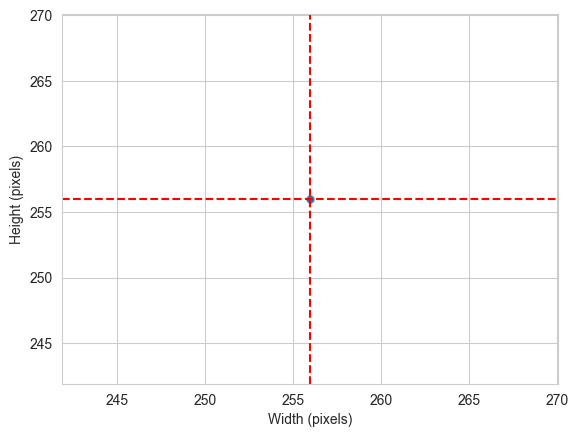

Width average: 256 
Height average: 256


In [21]:
dim1, dim2 = [], []
for label in labels:
    for image_filename in os.listdir(os.path.join(train_path, label)):
        img = imread(os.path.join(train_path, label, image_filename))
        d1, d2, colors = img.shape
        dim1.append(d1)
        dim2.append(d2)

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='r', linestyle='--')
axes.axhline(y=dim2_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

In [22]:
print(f"Width range: {min(dim2)} to {max(dim2)} pixels")
print(f"Height range: {min(dim1)} to {max(dim1)} pixels")
print(f"Unique widths: {sorted(set(dim2))}")
print(f"Unique heights: {sorted(set(dim1))}")

Width range: 256 to 256 pixels
Height range: 256 to 256 pixels
Unique widths: [256]
Unique heights: [256]


#### Save Image Size and Embeddings

In [63]:
image_shape = (128, 128, 3)
image_shape

(128, 128, 3)

In [64]:
joblib.dump(value=image_shape, filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

#### Conclusion Output 1: Save image shape embeddings

All images in the dataset already have the same dimensions (256 x 256 pixels). There are no outliers or variations in size. Therefor, no further processing is needed for standardization purposes.

Saving the Image shape configuration as a pickel file in a versionated folder is useful when further experimenting with image sizes to decide on the most efficient image size. With the help of versions, the model can also be trained with different dimensions if needed. Mainly however, saving configurations in version folders ensures consistency in case of further training the model at a later stage, ensuring the model is using images of the same size it has previously been trained with.

---

### Average and variability of images per label

Output 2: Define the mean and standard deviation of pixel values in healthy and infected leaf images. 

In order to create the plot to showcase this, the image data needs to be loaded into an array. In the following function the image shape is loaded along with the respective label in an array. 

**Parameters**: data path, size of images, number of images per label

This step prepares the image data for the training of the ml model.

A module is imported to load, resize, and convert the image files into numbers (num arrays). This is needed for the computer to be able to process the pictures.

How to find out what size to resize the images to? Use method `img.resize` and plot images to visually check whether downsizing them will affect feature recognition.

The images are converted into numbers, that the model is able to process.

### Resize images and load into numpy array

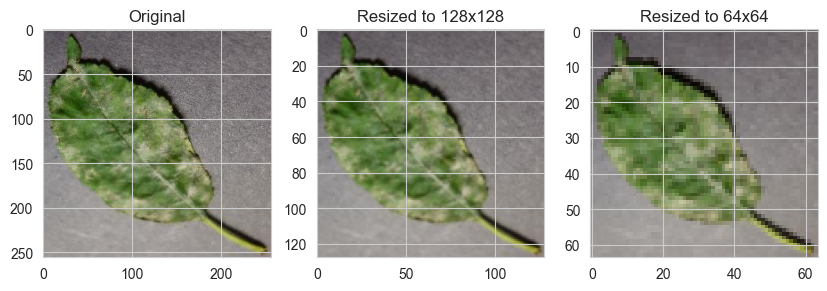

In [37]:
from tensorflow.keras.preprocessing import image

img_path = "inputs/mildew_dataset/cherry-leaves/test/powdery_mildew/1a64abff-82d4-45dc-b984-f1a5e6a5229e___FREC_Pwd.M 4952_flipLR.JPG"
img = image.load_img(img_path)

img_resized_128 = img.resize((128, 128))
img_resized_64 = img.resize((64, 64))

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(img_resized_128)
plt.title("Resized to 128x128")

plt.subplot(1, 3, 3)
plt.imshow(img_resized_64)
plt.title("Resized to 64x64")

plt.show()

In [67]:
def load_image_as_array(my_data_dir, new_size=(128, 128), n_images_per_label=20):
    """
    Function to convert images to numerical arrarys for model training
    Arguments are the path to image dataset folder, target image size and number of images per category
    
    Returns a tuple of x = numpy array of img data, y = numpy array of labels
    """

    X, y = np.array([], dtype='int'), np.array([], dtype='object')
    labels = os.listdir(my_data_dir)

    for label in labels:
        counter = 0
        for image_filename in os.listdir(os.path.join(my_data_dir, label)):
            if counter < n_images_per_label:
                img_path = os.path.join(my_data_dir, label, image_filename)

                img = image.load_img(img_path, target_size=new_size)

                if image.img_to_array(img).max() > 1:
                    img_resized = image.img_to_array(img) / 255
                else:
                    img_resized = image.img_to_array(img)

                X = np.append(X, img_resized).reshape(-1, new_size[0], new_size[1], img_resized.shape[2])
                y = np.append(y, label)
                counter += 1

    return X, y

Then, load images and labels into array

In [68]:
X, y = load_image_as_array(my_data_dir=train_path, new_size=image_shape, n_images_per_label=30)
print(X.shape, y.shape)

(60, 128, 128, 3) (60,)


---

### Plot and save mean and variability of images per label

Plot the average image to understand what a typical image of this dataset looks like. This helps to identify features and general structure of the image in question. 

The standard deviation within each class label tells about the level of diversity in how the images look. Low variability means that the images are quite similar to each other. High variability means they differ significantly from each other which can be challenging for the model to classify.

In [69]:
def plot_mean_variability_per_labels(X, y, figsize=(12, 5), save_image=False):
    """
    Function to create plots showing the mean and variablity of images of each class label.
    Args:
    * X = numpy array of image data
    * y = numpy array of image labels
    * figsize = size of output plot (width, height)
    * save_image = bool to save plot as image
    """

    for label_to_display in np.unique(y):
        sns.set_style("white")

        y = y.reshape(-1, 1, 1)
        boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
        arr = X[boolean_mask]

        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis=0)
        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f"Average image for label {label_to_display}")
        axes[0].imshow(avg_img, cmap='gray')
        axes[1].set_title(f"Variability image for label {label_to_display}")
        axes[1].imshow(std_img, cmap='gray')

        if save_image:
            plt.savefig(f"{file_path}/avg_var_{label_to_display}.png", bbox_inches='tight', dpi=125)
        else:
            plt.tight_layout()
            plt.show()
            print("\n")

==== Label healthy ====
Image Shape: (128, 128, 3)
==== Label powdery_mildew ====
Image Shape: (128, 128, 3)


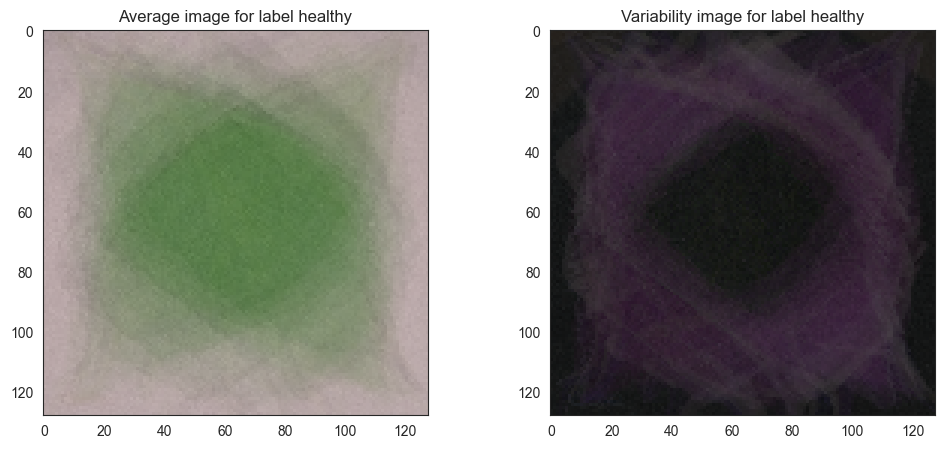

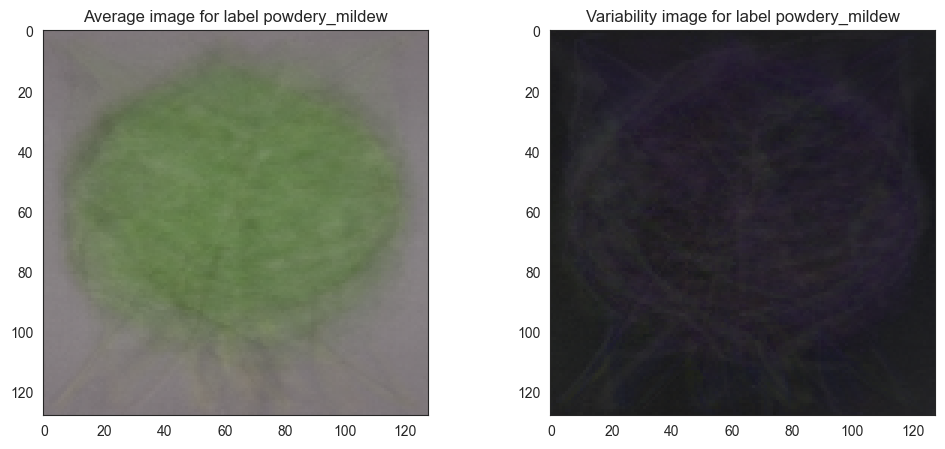

In [71]:
plot_mean_variability_per_labels(X=X, y=y, figsize=(12, 5), save_image=True)

### Differentiate average healthy and infected leaves

Create a function to compare the average images of the two class labels. It visualizes how the mean images of the two labels differ in pixel values. By plotting the result it helps analyze visual similarities and differences between the two class label categories.

In [72]:
def subset_image_label(X, y, label_to_display):
    """
    Function to reshape images for comparison and filter based on the label_to_display
    Returns extracted images corresponding to filtered label as variable
    """
    y = y.reshape(-1, 1, 1)
    boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
    df = X[boolean_mask]
    return df

In [73]:
def diff_bet_avg_image_labels_data_as_array(X, y, label_1, label_2, figsize=(20, 5), save_image=False):
    """
    Function to compare the average images of label_1 and label_2
    by calculating the mean image for each label and visualizing the difference
    """
    sns.set_style("white")

    # check if labels exist in dataset
    if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
        print(
            f"Either label {label_1} or label {label_2}, are not in"
            f" {np.unique(y)} ")
        return

    # calculate mean from label1
    images_label = subset_image_label(X, y, label_1)
    label1_avg = np.mean(images_label, axis=0)

    # calculate mean from label2
    images_label = subset_image_label(X, y, label_2)
    label2_avg = np.mean(images_label, axis=0)

    # compute difference and plot results
    difference_mean = label1_avg - label2_avg
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    axes[0].imshow(label1_avg, cmap='gray')
    axes[0].set_title(f'Average {label_1}')
    axes[1].imshow(label2_avg, cmap='gray')
    axes[1].set_title(f'Average {label_2}')
    axes[2].imshow(difference_mean, cmap='gray')
    axes[2].set_title(f'Difference image: Avg {label_1} & {label_2}')

    # save or show plot
    if save_image:
        plt.savefig(f"{file_path}/avg_diff.png", bbox_inches='tight', dpi=125)
    else:
        plt.tight_layout()
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.12183006877700492..0.3002614393830299].


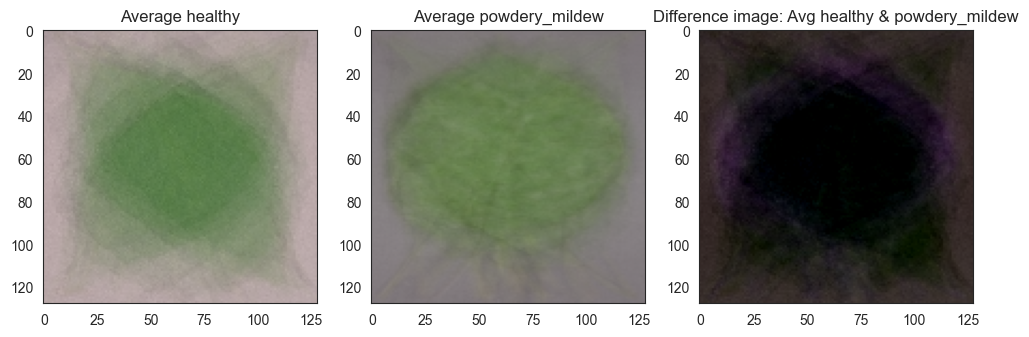

In [74]:
diff_bet_avg_image_labels_data_as_array(X=X,
                                        y=y,
                                        label_1='healthy',
                                        label_2='powdery_mildew',
                                        figsize=(12, 10),
                                        save_image=True
                                        )

---

NOTE

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
